

```
# This is formatted as code
```

# Heart Disease Prediction RF + GB Hybrid **(Second Cycle)** 🫀
---



## Package installation and import

In [ ]:
!pip install --upgrade pip
!pip install pandas-profiling

In [ ]:
#loading dataset
import pandas as pd
import numpy as np

#visualisation
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
#EDA
import ydata_profiling as pp

# data splitting
from sklearn.model_selection import train_test_split
# data modeling
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
#ensembling
#from mlxtend.classifier import StackingCVClassifier

## Exploring the Dataset

In [ ]:
df = pd.read_csv('heart.csv')
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,52,1,0,125,212,0,1,168,0,1.0,2,2,3,0
1,53,1,0,140,203,1,0,155,1,3.1,0,0,3,0
2,70,1,0,145,174,0,1,125,1,2.6,0,0,3,0
3,61,1,0,148,203,0,1,161,0,0.0,2,1,3,0
4,62,0,0,138,294,1,1,106,0,1.9,1,3,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1020,59,1,1,140,221,0,1,164,1,0.0,2,0,2,1
1021,60,1,0,125,258,0,0,141,1,2.8,1,1,3,0
1022,47,1,0,110,275,0,0,118,1,1.0,1,1,2,0
1023,50,0,0,110,254,0,0,159,0,0.0,2,0,2,1


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


In [ ]:
# Check for null values in the DataFrame
df.isnull()
# Count the number of null values in the DataFrame
df.isnull().sum()
# Check if there are any null values in the DataFrame
df.isnull().values.any()

False

In [ ]:
duplicates = df.duplicated()

df.duplicated().values.any()

True

<Axes: >

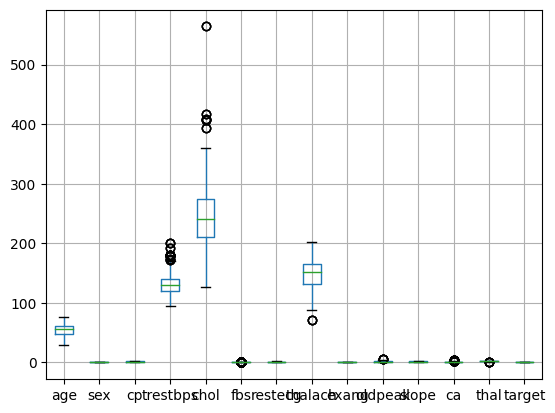

In [ ]:
# Identify outliers
df.boxplot()

In [ ]:
#Just to see data description (the cantik way)
#Can even check out other things like CORRELATIONS
pp.ProfileReport(df)

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

## Splitting

In [ ]:
y = df["target"]
X = df.drop('target',axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state = 0)

## Modelling

### Random Forest Model

In [ ]:
m3 = 'Random Forest Classfier'
rf = RandomForestClassifier(n_estimators=20, random_state=12,max_depth=5)
rf.fit(X_train,y_train)
rf_predicted = rf.predict(X_test)
rf_conf_matrix = confusion_matrix(y_test, rf_predicted)
rf_acc_score = accuracy_score(y_test, rf_predicted)
print("confussion matrix")
print(rf_conf_matrix)
print("\n")
print("Accuracy of Random Forest:",rf_acc_score*100,'\n')
print(classification_report(y_test,rf_predicted))

confussion matrix
[[ 88  10]
 [  3 104]]


Accuracy of Random Forest: 93.65853658536587 

              precision    recall  f1-score   support

           0       0.97      0.90      0.93        98
           1       0.91      0.97      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.93      0.94       205
weighted avg       0.94      0.94      0.94       205



### Gradient Boosting Model

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier


# Create the Gradient Boosting model
gb = GradientBoostingClassifier(learning_rate=0.1, n_estimators=30, max_depth=3, random_state=42)
gb.fit(X_train, y_train)
gb_predicted = gb.predict(X_test)

# Calculate accuracy and other metrics
gb_acc_score = accuracy_score(y_test, gb_predicted)
gb_conf_matrix = confusion_matrix(y_test, gb_predicted)

print("Confusion matrix:")
print(gb_conf_matrix)
print("\n")
print("Accuracy of Gradient Boosting:", gb_acc_score * 100)
print("\n")
print("Classification Report:")
print(classification_report(y_test, gb_predicted))


Confusion matrix:
[[ 90   8]
 [  4 103]]


Accuracy of Gradient Boosting: 94.14634146341463


Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.92      0.94        98
           1       0.93      0.96      0.94       107

    accuracy                           0.94       205
   macro avg       0.94      0.94      0.94       205
weighted avg       0.94      0.94      0.94       205



## RF & GB Hybrid using Voting Classifier

In [ ]:
# Ensemble Learning - Voting Classifier
from sklearn.ensemble import VotingClassifier

ensemble_model = VotingClassifier(estimators=[('RF', rf),('GB',gb)])
ensemble_model.fit(X_train, y_train)

VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(max_depth=5,
                                                     n_estimators=20,
                                                     random_state=12)),
                             ('GB',
                              GradientBoostingClassifier(n_estimators=30,
                                                         random_state=42))])

In [ ]:
# Create the hybrid model using VotingClassifier
hybrid_model = VotingClassifier(estimators=[('RF', rf), ('XGB', gb)])


# Fit the hybrid model on the training data
hybrid_model.fit(X_train, y_train)

# Make predictions using the hybrid model
voting_predicted = hybrid_model.predict(X_test)

# Evaluate the hybrid model
hybrid_conf_matrix = confusion_matrix(y_test, voting_predicted)
hybrid_acc_score = accuracy_score(y_test, voting_predicted)

print("Confusion matrix:")
print(hybrid_conf_matrix)
print("\n")
print("Accuracy of the hybrid model:", hybrid_acc_score*100, '\n')
print(classification_report(y_test, voting_predicted))


Confusion matrix:
[[ 92   6]
 [  4 103]]


Accuracy of the hybrid model: 95.1219512195122 

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        98
           1       0.94      0.96      0.95       107

    accuracy                           0.95       205
   macro avg       0.95      0.95      0.95       205
weighted avg       0.95      0.95      0.95       205



## Evaluation

In [ ]:
# RF & GB Hybrid using Voting Classifier
ensemble_model = VotingClassifier(estimators=[('RF', rf), ('GB', gb)])
ensemble_model.fit(X_train, y_train)
ensemble_predicted = ensemble_model.predict(X_test)
ensemble_conf_matrix = confusion_matrix(y_test, ensemble_predicted)
ensemble_acc_score = accuracy_score(y_test, ensemble_predicted)


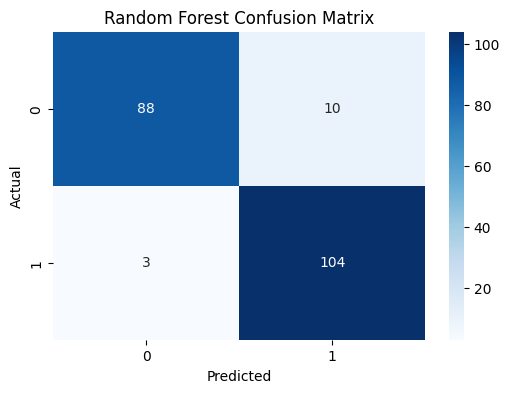

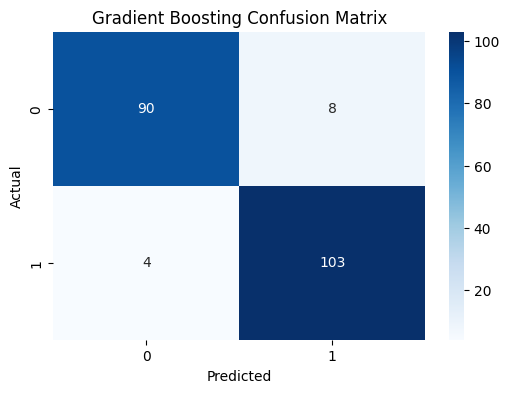

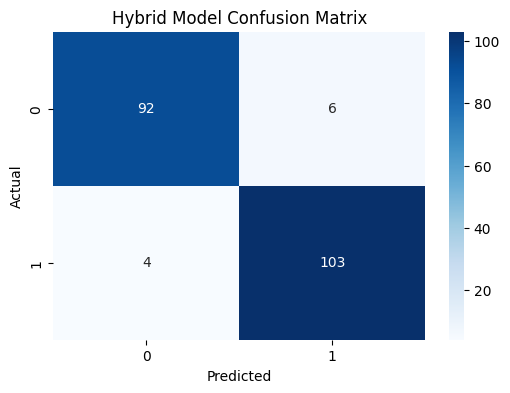

Random Forest Accuracy: 93.65853658536587
Gradient Boosting Accuracy: 94.14634146341463
Hybrid Model Accuracy: 95.1219512195122


In [ ]:
# Visualization
# Confusion Matrix for Random Forest
plt.figure(figsize=(6, 4))
sns.heatmap(rf_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Gradient Boosting
plt.figure(figsize=(6, 4))
sns.heatmap(gb_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Gradient Boosting Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Confusion Matrix for Hybrid Model
plt.figure(figsize=(6, 4))
sns.heatmap(ensemble_conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.title("Hybrid Model Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Evaluation
print("Random Forest Accuracy:", rf_acc_score * 100)
print("Gradient Boosting Accuracy:", gb_acc_score * 100)
print("Hybrid Model Accuracy:", ensemble_acc_score * 100)

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

# ROC Curve for Random Forest
rf_probs = rf.predict_proba(X_test)[:, 1]
rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

# ROC Curve for Gradient Boosting
gb_probs = gb.predict_proba(X_test)[:, 1]
gb_fpr, gb_tpr, _ = roc_curve(y_test, gb_probs)
gb_auc = roc_auc_score(y_test, gb_probs)

# ROC Curve for Hybrid Model
ensemble_probs = ensemble_model.predict_proba(X_test)[:, 1]
ensemble_fpr, ensemble_tpr, _ = roc_curve(y_test, ensemble_probs)
ensemble_auc = roc_auc_score(y_test, ensemble_probs)

# Plotting the ROC Curves
plt.figure(figsize=(8, 6))
plt.plot(rf_fpr, rf_tpr, label='Random Forest (AUC = {:.2f})'.format(rf_auc))
plt.plot(gb_fpr, gb_tpr, label='Gradient Boosting (AUC = {:.2f})'.format(gb_auc))
plt.plot(ensemble_fpr, ensemble_tpr, label='Hybrid Model (AUC = {:.2f})'.format(ensemble_auc))
plt.plot([0, 1], [0, 1], 'k--')  # Random Guess Line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# ROC AUC scores
print("Random Forest AUC:", rf_auc)
print("Gradient Boosting AUC:", gb_auc)
print("Hybrid Model AUC:", ensemble_auc)


In [ ]:
# Feature Importance - Gradient Boosting
gb = GradientBoostingClassifier(random_state=12, max_depth=5)
gb.fit(X_train, y_train)

# Feature Importance - Random Forest
rf = RandomForestClassifier(n_estimators=20, random_state=12, max_depth=5)
rf.fit(X_train, y_train)

# Combine feature importances from both models
importances_gb = gb.feature_importances_
importances_rf = rf.feature_importances_
feature_names = X.columns

# Plotting the feature importances
plt.figure(figsize=(10, 6))
plt.barh(feature_names, importances_gb, label='Gradient Boosting')
plt.barh(feature_names, importances_rf, alpha=0.7, label='Random Forest')
plt.xlabel('Feature Importance')
plt.ylabel('Features')
plt.title('Feature Importance Comparison')
plt.legend()
plt.show()



In [ ]:
!pip install shap


In [ ]:
import shap
import matplotlib
import matplotlib.pyplot as plt

# Extract the individual classifiers from the VotingClassifier
rf_classifier = ensemble_model.named_estimators_['RF']
gb_classifier = ensemble_model.named_estimators_['GB']

# Create separate TreeExplainer instances for each classifier
rf_explainer = shap.TreeExplainer(rf_classifier)
gb_explainer = shap.TreeExplainer(gb_classifier)

# Calculate SHAP values for the test set
rf_shap_values = rf_explainer.shap_values(X_test)
gb_shap_values = gb_explainer.shap_values(X_test)

colors = ["blue", "green"]
cmap = matplotlib.colors.LinearSegmentedColormap.from_list("", colors)

# Plot SHAP summary for the Random Forest classifier
plt.title('SHAP summary for Random Forest classifier')
shap.summary_plot(rf_shap_values[1], X_test, cmap=cmap)


In [ ]:
# Plot SHAP summary for the Gradient Boosting classifier
plt.title('SHAP summary for Gradient Boosting classifier')
shap.summary_plot(gb_shap_values, X_test, cmap=cmap)